<h2 style="text-align: center;">Machine Learning Pipeline using Decison Tree Algorithm
</h2>


<h3 style="text-align: center;">Libraries
</h3>


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report

<h3 style="text-align: center;">Loading Data
</h3>


In [2]:
data = pd.read_csv("car_evaluation.csv")

In [3]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

<h3 style="text-align: center;">Changing Column Names
</h3>


In [6]:
new_column_names = {
    'vhigh': 'Buying Price',
    'vhigh.1': 'Maintenance Price',
    '2': 'Number of Doors',
    '2.1': 'Number of Seats',
    'small': 'Luggage Boot Size',
    'low': 'Safety Rating',
    'unacc': 'Acceptability'
}

data.rename(columns=new_column_names, inplace=True)


In [12]:
data.head(7)

,Buying Price,Maintenance Price,Number of Doors,Number of Seats,Luggage Boot Size,Safety Rating,Acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc


In [8]:
data.columns

Index(['Buying Price', 'Maintenance Price', 'Number of Doors',
       'Number of Seats', 'Luggage Boot Size', 'Safety Rating',
       'Acceptability'],
      dtype='object')

In [11]:
shape = data.shape
print("Shape of the dataset:",shape)

Shape of the dataset: (1727, 7)



<h3 style="text-align: center;">Data Preprocessing
</h3>


In [15]:
missing_values = data.isna().sum()

print(missing_values)

Buying Price         0
Maintenance Price    0
Number of Doors      0
Number of Seats      0
Luggage Boot Size    0
Safety Rating        0
Acceptability        0
dtype: int64



<h3 style="text-align: center;">Encoding Data
</h3>


In [17]:
label_encoders = {}

In [26]:
categorical_columns = ['Buying Price', 'Maintenance Price', 'Luggage Boot Size', 'Safety Rating']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [33]:
data.sample()

,Buying Price,Maintenance Price,Number of Doors,Number of Seats,Luggage Boot Size,Safety Rating,Acceptability
1530,1,2,2,more,2,2,unacc


In [35]:
data.loc[data['Number of Doors'] == '5more', 'Number of Doors'] = '5'
data.loc[data['Number of Seats'] == 'more', 'Number of Seats'] = '5'


In [36]:
data["Number of Seats"].unique()

array(['2', '4', '5'], dtype=object)

In [37]:
numerical_columns = ['Number of Doors', 'Number of Seats']



<h3 style="text-align: center;">Data Scaling
</h3>


In [38]:
scaler = StandardScaler()

In [39]:
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])



<h3 style="text-align: center;">Independent and Dependent Datam
</h3>


In [44]:
X = data.drop('Acceptability', axis=1)
y = data['Acceptability']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50,
    shuffle=True, stratify=y, 
)


<h3 style="text-align: center;">Data Modelling
</h3>


In [55]:
model = DecisionTreeClassifier(random_state=42)

In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred = model.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9624277456647399



<h3 style="text-align: center;">Decision Tree 
</h3>


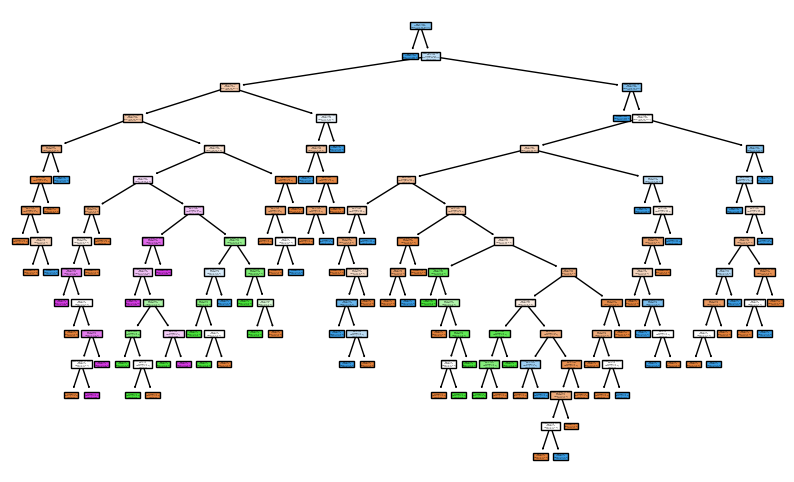

In [61]:
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [63]:
class_report = classification_report(y_test, y_pred)



<h3 style="text-align: center;">Confusion Matrix and Classification Report
</h3>


In [64]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[ 71   2   4   0]
 [  3  11   0   0]
 [  4   0 238   0]
 [  0   0   0  13]]

Classification Report:
               precision    recall  f1-score   support

         acc       0.91      0.92      0.92        77
        good       0.85      0.79      0.81        14
       unacc       0.98      0.98      0.98       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.96       346
   macro avg       0.93      0.92      0.93       346
weighted avg       0.96      0.96      0.96       346

